# EM Algorithm in 1D

Let'start with a bunch of fake data points.

In [15]:
x = matrix(nrow = 200)
x[1:50] = rnorm(n=50, mean=3)
x[51:200] = rnorm(n=50, mean=-3)

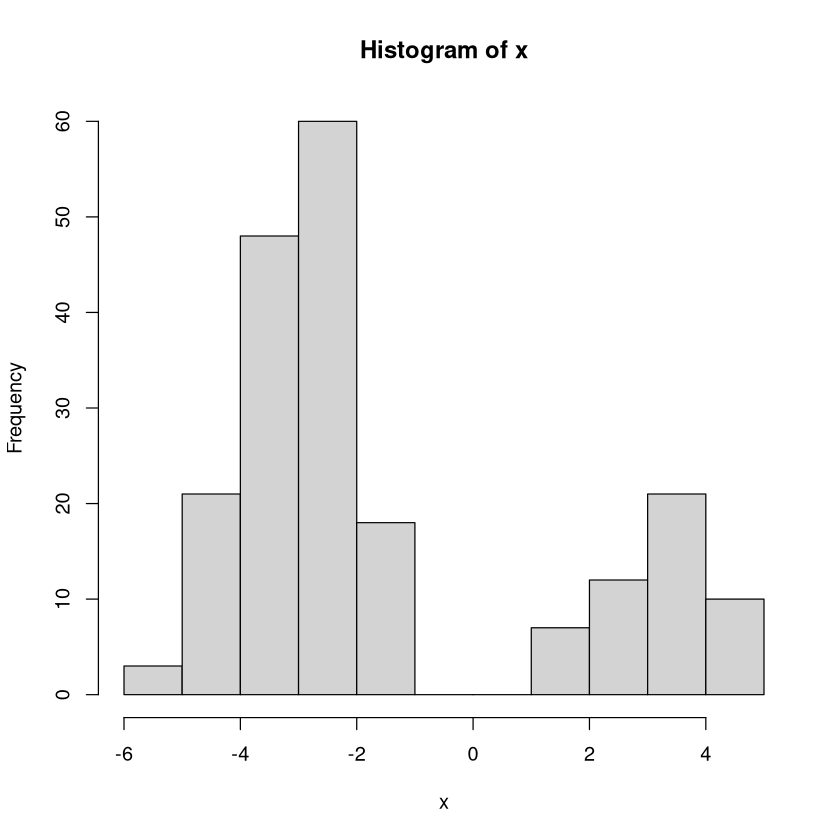

In [16]:
hist(x)

## Implementation of the EM Algorithm in 1D

### Initialization of the parameters

In [17]:
n = length(x)

K = 2 

# Initalizes the parameters \theta^0
mu = rnorm(K, mean(x), sd=1)
prop = rep(1/K, K)
sigma = rep(1, K)
gamma = matrix(NA, n, K)

In [18]:
print(mu)

[1] -1.88541662 -0.01870914


### Computation of the initial log-likelihood

$$\mathcal{l} = \sum_{i=1}^N \log\left(\sum_{k=1}^K \pi_k\mathcal{N}(x_i|\mu_k, \Sigma_k)\right)$$

In [19]:
normalise <- function (x) {
  logratio = log(x) - logsumexp(log(x))
  exp(logratio)
}

logsumexp <- function (x) {
  y = max(x)
  y + log(sum(exp(x - y)))
}

loglikelihood <- function(x, K, prop, mu, sigma) {
    llh = 0
    for (k in 1:K){
        llh = llh + prop[k] * dnorm(x, mu[k], sigma[k])
    }
    sum(log(llh))
}

In [20]:
loglikelihood(x, K, prop, mu, sigma)

[1] -750.9516

However, for optimization purposes it is either to compute gamma first (specifically its log).

In [21]:
log_gamma_numerator <- function(n, K, x, prop, mu, sigma) {
    lgn = matrix(nrow=n, ncol=K)
    for (k in 1:K){
        lgn[,k] = log(prop[k]) + dnorm(x,mu[k],sigma[k],log=TRUE)
    }    
    return(lgn)
}

In [22]:
lgn = log_gamma_numerator(n, K, x, prop, mu, sigma)
lgn = lgn - apply(lgn, 1, logsumexp)

In [23]:
sum(apply(log_gamma_numerator(n, K, x, prop, mu, sigma), 1, logsumexp))

[1] -750.9516

### Charles Bouveyron's code

In [28]:
em1d <- function(n,K,x,prop,mu,sigma,max_it=50){
  for (i in 1:max_it){
    # E step
    lgn = log_gamma_numerator(n, K, x, prop, mu, sigma)
    ## normalize each line of gamma
    log_gamma = lgn - apply(lgn, 1, logsumexp)
    gamma = exp(log_gamma)
    # M step
    for (k in 1:K){
      nk = sum(gamma[,k])
      prop[k] = nk / n
      mu[k] = sum(gamma[,k]*x) / nk
      sigma[k] = sqrt(sum(gamma[,k]*(x-mu[k])^2) / nk)
    }
    
    # plot of the data and the means
    
    print(mu)
      
    # Evaluate the log-likelihood
    
    log_likelihood = sum(apply(lgn, 1, logsumexp))
    print(log_likelihood)
      
  }
  
  # Compute BIC
  
  # Return the results
  #list(gamma,prop,mu,sigma)
}

In [29]:
em1d(n,K,x,prop,mu,sigma,max_it=50)

[1] -3.106690  2.460627
[1] -750.9516
[1] -3.074037  2.938939
[1] -398.1064
[1] -3.059365  3.141933
[1] -384.2021
[1] -3.058789  3.147948
[1] -377.4504
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.058788  3.147951
[1] -377.4357
[1] -3.05878